# Example 11-10: Runge-Kutta for a system of ODEs

So far, we've explored a variety of numerical methods for solving a single ODE.
Now we will extend these methods to solve a system of ODEs.
You'll see that the logic is largely the same, but we have to be more careful about indexing as $y$ will now be a 2D array.

## Summary of commands

No new commands are demonstrated in this exercise, but we will extend [Example 11-8](11-8_runge-kutta_demo) to work for multiple dependent variables ($y$).

## Lotka-Volterra model

One of the best-known coupled ODEs is the Lotka-Volterra population model:

$$ \begin{align*}
\frac{dR(t)}{dt} &=  aR(t) - bR(t) F(t) \\
\frac{dF(t)}{dt} &= -cF(t) + dR(t) F(t)
\end{align*} $$

where $F(t)$ represents the population of foxes (predators) over time and $R(t)$ represents the population of rabbits (prey).
The product of the two variables represents direct interactions and $a$, $b$, $c$, and $d$ are proportionality constants.

If we put the populations into an array, we might get something like the following:

$$ \begin{bmatrix}
y(0, 0) & y(0, 1) \\
y(1, 0) & y(1, 1) \\
\vdots  & \vdots  \\
y(N-1, 0) & y(N-1, 1) \\
\end{bmatrix} $$

where $y(:, 0) = R(t)$ and $y(:, 1) = F(t)$.

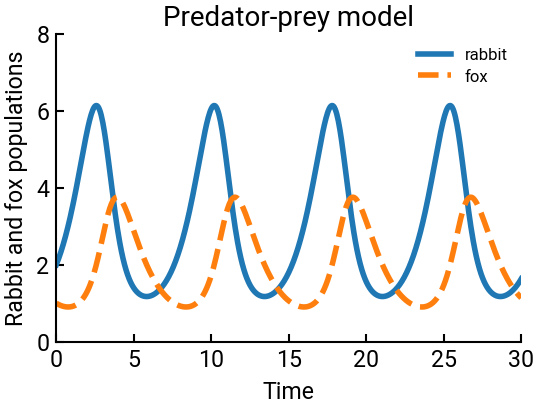

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# Lotka-Volterra model
def LV(t, y, a, b, c, d):
    R, F = y    # for readability, extract the columns of y into separate variables
    return np.array([a * R - b * R * F, -c * F + d * R * F])

# 4th-order Runge-Kutta
def RK4(f, t0, tf, y0, h, args):
    t = np.arange(t0, tf + h, h)
    y = np.zeros([len(t), len(y0)])   # note!
    y[0, :] = y0    # initial condition is first row
    for n in range(len(t) - 1):
        k1 = f(t[n], y[n, :], *args)
        k2 = f(t[n] + 0.5 * h, y[n, :] + 0.5 * h * k1, *args)
        k3 = f(t[n] + 0.5 * h, y[n, :] + 0.5 * h * k2, *args)
        k4 = f(t[n] + h, y[n, :] + h * k3, *args)
        y[n+1, :] = y[n, :] + 1/6 * h * (k1 + 2 * k2 + 2 * k3 + k4)
    return t, y

# initialization
a = 1
b = 0.5
c = 0.75
d = 0.25
R0 = 2
F0 = 1
t0 = 0
tf = 30
h = 0.05

# Runge-Kutta method
t, y = RK4(LV, t0, tf, [R0, F0], h, [a, b, c, d])

# plot results
fig, ax = plt.subplots()
ax.plot(t, y[:, 0], label='rabbit')
ax.plot(t, y[:, 1], '--', label='fox')
ax.set(xlabel='Time', ylabel='Rabbit and fox populations', title="Predator-prey model",
       xlim=[0, tf], ylim=[0, 8])
ax.legend(fontsize=12)
plt.show()